# Visualization of a Discrete Memoryless Channel (DMC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Some utility functions for sampling random channel inputs, applying the channel to the channel inputs and checking wether a DMC is symmetric.

In [2]:
rng = np.random.default_rng()

def random_channel_input(length):
    return rng.choice(num_inputs, length, p=input_distribution)

def apply_dmc(x):
    y = np.zeros_like(x)
    for x_in in range(num_inputs):
        input_mask = x == x_in
        y[input_mask] = rng.choice(num_outputs, np.count_nonzero(input_mask), p=transition_matrix[:, x_in])
    return y

def check_symmetric(transition_matrix):
    assert np.all(np.sum(transition_matrix, axis=0) == 1), 'Transition matrix columns do not sum to 1'

    columns_are_permutations = all([set(transition_matrix[:, 0]) == set(transition_matrix[:, i]) for i in range(1, num_inputs)])
    rows_are_permutations =    all([set(transition_matrix[0, :]) == set(transition_matrix[i, :]) for i in range(1, num_outputs)])
    equal_row_sums =           all([sum(transition_matrix[0, :]) == sum(transition_matrix[i, :]) for i in range(1, num_outputs)])

    if columns_are_permutations and rows_are_permutations:
        print('The DMC is symetrical!')
    elif columns_are_permutations and equal_row_sums:
        print('The DMC is weakly symetrical!')
    else:
        print('The DMC is not symetrical!')

log2 = np.vectorize(lambda x: 1e10 if x == 0 else np.log2(x))

Define a DMC via its transition matrix, then sample from an input distribution and transmit the samples over the channel. Finally, show the channel input and output distribution as well as the mutual information.

The DMC is symetrical!
I(X;Y) = H(Y) - H(Y|X) =  1.585 - 1.571 = 0.0140 (bit / channel use)


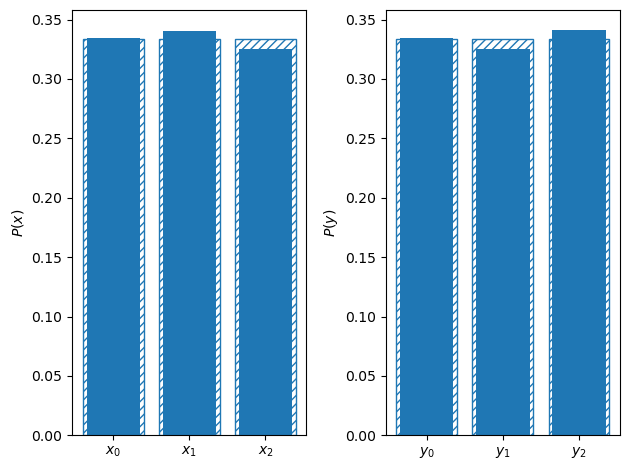

In [3]:
transition_matrix = np.array([
    [0.4, 0.3, 0.3],
    [0.3, 0.4, 0.3],
    [0.3, 0.3, 0.4],

    # [1/6, 0.5],
    # [0.5, 1/6],
    # [1/3, 1/3],

    # [1.0, 1/3, 1/3],
    # [0.0, 1/3, 1/3],
    # [0.0, 1/3, 1/3],
])
num_outputs, num_inputs = transition_matrix.shape

input_distribution = np.ones(num_inputs) / num_inputs
# input_distribution = np.array([0.0, 0.0, 0.0])
# input_distribution = np.array([0.58, 0.21, 0.21])

# Do some checks
check_symmetric(transition_matrix)
assert np.allclose(np.sum(input_distribution), 1)
assert len(input_distribution) == num_inputs

# Compute mutual information
output_distribution = transition_matrix @ input_distribution
H_Y = -np.sum(output_distribution * log2(output_distribution))
H_YgivenX = -np.sum(transition_matrix * input_distribution * log2(transition_matrix))
print(f'I(X;Y) = H(Y) - H(Y|X) =  {H_Y:.3f} - {H_YgivenX:.3f} = {H_Y - H_YgivenX:.4f} (bit / channel use)')

# Sample channel inputs and transmit over the channel
x = random_channel_input(5000)
y = apply_dmc(x)

# Plot channel input distribution
ax1 = plt.subplot(121)
input_bins = np.arange(num_inputs + 1) - 0.5
plt.bar(np.arange(num_inputs), input_distribution, edgecolor='tab:blue', hatch='////', fill=False)
plt.hist(x, input_bins, weights=np.ones_like(x)/len(x), rwidth=0.7)
plt.xticks(np.arange(num_inputs), [f'$x_{i}$' for i in range(num_inputs)])
plt.ylabel('$P(x)$')

# Plot channel output distribution
plt.subplot(122, sharey=ax1)
output_bins = np.arange(num_outputs + 1) - 0.5
plt.bar(np.arange(num_outputs), output_distribution, edgecolor='tab:blue', hatch='////', fill=False)
plt.hist(y, output_bins, weights=np.ones_like(y)/len(y), rwidth=0.7)
plt.xticks(np.arange(num_outputs), [f'$y_{i}$' for i in range(num_outputs)])
plt.ylabel('$P(y)$')
plt.tight_layout()